# Creating clusters on global development measurement

The dataset has information about important economic and development metrics related
to various countries across the globe.

In [1]:
# importing the liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data=pd.read_excel("C:/DS/Project 1/World_development_mesurement.xlsx")

In [3]:
# First 5 rows of the dataset
data.head()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,"$23,000,000","$30,000,000"


In [4]:
# Last 5 rows of the dataset
data.tail()

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
2699,NaN,NaN,NaN,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,32427.0,0.911,NaN,NaN
2700,0.013,46.4%,NaN,United States,5.0,4.0,2132446.0,"$16,244,600,000,000",0.179,"$8,895",...,76.0,1.0,1.0,0.196,0.667,0.136,313873685.0,0.811,"$200,092,000,000","$126,573,000,000"
2701,0.015,41.9%,NaN,Uruguay,7.0,85.0,NaN,"$50,004,354,667",0.089,"$1,308",...,74.0,1.5,1.0,0.220,0.639,0.140,3395253.0,0.948,"$2,222,000,000","$1,028,000,000"
2702,0.020,61.9%,NaN,"Venezuela, RB",144.0,180.0,NaN,"$381,286,223,859",0.046,$593,...,72.0,1.0,1.0,0.288,0.652,0.060,29954782.0,0.889,"$904,000,000","$3,202,000,000"
2703,0.011,NaN,NaN,Virgin Islands (U.S.),NaN,NaN,NaN,NaN,NaN,NaN,...,76.0,NaN,1.0,0.206,0.641,0.152,105275.0,0.949,NaN,NaN


# Renaming the column names

In [5]:
# Renaming the dataset columns
data.rename(columns={ 'Birth Rate':'birth_rate',
                    'Business Tax Rate':'business_tax_rate',
                    'CO2 Emissions':'co2_emissions',
                    'Days to Start Business':'dtos_business',
                    'Ease of Business':'ease_of_business',
                    'Energy Usage':'energy_usage',
                    'Health Exp % GDP':'hlth_exp_per_gdp',
                    'Health Exp/Capita':'health_exp_capita',
                    'Hours to do Tax':'hours_to_do_tax',
                    'Infant Mortality Rate':'infant_mortality_rate',
                    'Internet Usage':'internet_usage',
                    'Lending Interest':'lending_interest',
                           'Life Expectancy Female':'life_expectancy_female',
                           'Life Expectancy Male':'life_expectancy_male',
                           'Mobile Phone Usage':'mob_ph_usage',
                           'Number of Records':'num_of_records',  
                           'Population 0-14':'pop_0_to_14',
                           'Population 15-64':'Pop_15_to_64',
                           'Population 65+':'pop_65_plus',
                           'Population Total':'pop_Total',
                           'Population Urban':'pop_Urban',
                           'Tourism Inbound':'tourism_inbound',
                           'Tourism Outbound':'tourism_outbound'}, inplace=True)

In [6]:
data.columns

Index(['birth_rate', 'business_tax_rate', 'co2_emissions', 'Country',
       'dtos_business', 'ease_of_business', 'energy_usage', 'GDP',
       'hlth_exp_per_gdp', 'health_exp_capita', 'hours_to_do_tax',
       'infant_mortality_rate', 'internet_usage', 'lending_interest',
       'life_expectancy_female', 'life_expectancy_male', 'mob_ph_usage',
       'num_of_records', 'pop_0_to_14', 'Pop_15_to_64', 'pop_65_plus',
       'pop_Total', 'pop_Urban', 'tourism_inbound', 'tourism_outbound'],
      dtype='object')

In [7]:
data.head()

,birth_rate,business_tax_rate,co2_emissions,Country,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,...,life_expectancy_male,mob_ph_usage,num_of_records,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,"$23,000,000","$30,000,000"


In [8]:
for col in data.columns:
    print("%s unique count: %d" % (col, data[col].nunique()))
    print(data[col].unique(), '\n')

birth_rate unique count: 47
[0.02  0.05  0.043 0.027 0.046 0.042 0.041 0.039 0.051 0.048 0.038 0.03
 0.025 0.04  0.044 0.034 0.045 0.035 0.031 0.022 0.017 0.032 0.053 0.036
 0.019 0.049 0.024 0.033 0.013 0.015 0.028 0.023 0.014 0.012 0.008 0.026
 0.009 0.018 0.021 0.011 0.01    nan 0.029 0.016 0.037 0.047 0.007 0.052] 

business_tax_rate unique count: 447
[nan '76.9%' '52.1%' '75.7%' '17.1%' '47.5%' '279.7%' '50.6%' '65.7%'
 '74.0%' '217.9%' '286.5%' '64.9%' '47.3%' '37.8%' '54.3%' '44.1%' '84.5%'
 '30.3%' '45.1%' '286.0%' '39.8%' '80.7%' '54.2%' '49.8%' '28.8%' '46.9%'
 '33.4%' '51.4%' '94.7%' '26.2%' '51.7%' '37.5%' '25.8%' '42.3%' '31.6%'
 '46.8%' '50.3%' '48.4%' '272.0%' '37.6%' '49.7%' '36.3%' '43.8%' '52.5%'
 '60.6%' '36.9%' '15.4%' '32.3%' '36.6%' '46.4%' '35.3%' '40.8%' '21.5%'
 '80.0%' '57.0%' '24.1%' '66.6%' '35.4%' '68.1%' '35.2%' '36.0%' '9.3%'
 '32.5%' '43.1%' '47.2%' '27.7%' '56.7%' '79.9%' '96.7%' '39.9%' '58.2%'
 '137.3%' '59.5%' '42.8%' '45.2%' '21.4%' '48.8%' '33.3%' 

data having some special charectors like $ and %

we have to remove that symbols

business_tax_rate,GDP,health_exp_capita,tourism_inbound,tourism_outbound these colums are having the symbols in their data



In [9]:
# Removing $ and % from the datset
data.business_tax_rate=pd.to_numeric(data.business_tax_rate.replace('[^0-9\.-]', '', regex=True))
data.GDP=pd.to_numeric(data.GDP.replace('[^0-9\.-]', '', regex=True))
data.health_exp_capita=pd.to_numeric(data.health_exp_capita.replace('[^0-9\.-]', '', regex=True))
data.tourism_inbound=pd.to_numeric(data.tourism_inbound.replace('[^0-9\.-]', '', regex=True))
data.tourism_outbound=pd.to_numeric(data.tourism_outbound.replace('[^0-9\.-]', '', regex=True))

# Getting Data information

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   birth_rate              2585 non-null   float64
 1   business_tax_rate       1423 non-null   float64
 2   co2_emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   dtos_business           1718 non-null   float64
 5   ease_of_business        185 non-null    float64
 6   energy_usage            1785 non-null   float64
 7   GDP                     2494 non-null   float64
 8   hlth_exp_per_gdp        2395 non-null   float64
 9   health_exp_capita       2395 non-null   float64
 10  hours_to_do_tax         1416 non-null   float64
 11  infant_mortality_rate   2444 non-null   float64
 12  internet_usage          2531 non-null   float64
 13  lending_interest        1880 non-null   float64
 14  life_expectancy_female  2568 non-null   

There are some missing values in the data

By taking the mean values to fill the null values

In [11]:
data.shape

(2704, 25)

In [12]:
data.duplicated().sum()

0

In [13]:
data.describe()

,birth_rate,business_tax_rate,co2_emissions,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,hours_to_do_tax,...,life_expectancy_male,mob_ph_usage,num_of_records,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound
count,2585.000000,1423.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2.494000e+03,2395.000000,2395.000000,1416.000000,...,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2.336000e+03,2.233000e+03
mean,0.022715,48.966901,1.423071e+05,39.999418,94.875676,7.723684e+04,2.638540e+11,0.064170,801.397077,302.068503,...,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09
std,0.011338,40.954116,6.159288e+05,57.318588,54.791906,2.599239e+05,1.129910e+12,0.026325,1473.448036,273.299686,...,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,1.385098e+10,1.326774e+10
min,0.007000,8.200000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,...,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05
25%,0.013000,32.400000,1.360000e+03,13.000000,48.000000,3.737000e+03,3.539042e+09,0.046000,50.000000,156.000000,...,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,1.250000e+08,1.100000e+08
50%,0.020000,41.000000,8.529000e+03,26.000000,94.000000,1.433800e+04,1.507975e+10,0.061000,193.000000,239.000000,...,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08
75%,0.031000,51.550000,5.910800e+04,45.000000,142.000000,4.185200e+04,1.102047e+11,0.079000,665.000000,344.750000,...,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,3.601500e+09,2.842000e+09
max,0.053000,339.100000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,9908.000000,2600.000000,...,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11


In [14]:
data.isnull().sum()

birth_rate                 119
business_tax_rate         1281
co2_emissions              579
Country                      0
dtos_business              986
ease_of_business          2519
energy_usage               919
GDP                        210
hlth_exp_per_gdp           309
health_exp_capita          309
hours_to_do_tax           1288
infant_mortality_rate      260
internet_usage             173
lending_interest           824
life_expectancy_female     136
life_expectancy_male       136
mob_ph_usage               167
num_of_records               0
pop_0_to_14                220
Pop_15_to_64               220
pop_65_plus                220
pop_Total                    0
pop_Urban                   26
tourism_inbound            368
tourism_outbound           471
dtype: int64

In [15]:
#null value
data.isna().sum().sort_values(ascending=False)

ease_of_business          2519
hours_to_do_tax           1288
business_tax_rate         1281
dtos_business              986
energy_usage               919
lending_interest           824
co2_emissions              579
tourism_outbound           471
tourism_inbound            368
hlth_exp_per_gdp           309
health_exp_capita          309
infant_mortality_rate      260
pop_0_to_14                220
pop_65_plus                220
Pop_15_to_64               220
GDP                        210
internet_usage             173
mob_ph_usage               167
life_expectancy_male       136
life_expectancy_female     136
birth_rate                 119
pop_Urban                   26
num_of_records               0
pop_Total                    0
Country                      0
dtype: int64

# Filling null values in variables

In [16]:
birth_rate_mean=np.mean(data.birth_rate)
business_tax_rate_mean=np.mean(data.business_tax_rate)
co2_emissions_mean=np.mean(data.co2_emissions)
dtos_business_mean=np.mean(data.dtos_business)
ease_of_business_mean=np.mean(data.ease_of_business)
energy_usage_mean=np.mean(data.energy_usage)
GDP_mean=np.mean(data.GDP)
hlth_exp_per_gdp_mean=np.mean(data.hlth_exp_per_gdp)
health_exp_capita_mean=np.mean(data.health_exp_capita)
hours_to_do_tax_mean=np.mean(data.hours_to_do_tax)
infant_mortality_rate_mean=np.mean(data.infant_mortality_rate)
internet_usage_mean=np.mean(data.internet_usage)
lending_interest_mean=np.mean(data.lending_interest)
life_expectancy_female_mean=np.mean(data.life_expectancy_female)
life_expectancy_male_mean=np.mean(data.life_expectancy_male)
mob_ph_usage_mean=np.mean(data.mob_ph_usage)
num_of_records_mean=np.mean(data.num_of_records)
pop_0_to_14_mean=np.mean(data.pop_0_to_14)
Pop_15_to_64_mean=np.mean(data.Pop_15_to_64)
pop_65_plus_mean=np.mean(data.pop_65_plus)
pop_Total_mean=np.mean(data.pop_Total)
pop_Urban_mean=np.mean(data.pop_Urban)
tourism_inbound_mean=np.mean(data.tourism_inbound)
tourism_outbound_mean=np.mean(data.tourism_outbound)

In [17]:
data['ease_of_business']=data['ease_of_business'].fillna(ease_of_business_mean)
data['hours_to_do_tax']=data['hours_to_do_tax'].fillna(hours_to_do_tax_mean)
data['dtos_business']=data['dtos_business'].fillna(dtos_business_mean)
data['energy_usage']=data['energy_usage'].fillna(energy_usage_mean)
data['lending_interest']=data['lending_interest'].fillna(lending_interest_mean)
data['co2_emissions']=data['co2_emissions'].fillna(co2_emissions_mean)
data['hlth_exp_per_gdp']=data['hlth_exp_per_gdp'].fillna(hlth_exp_per_gdp_mean)
data['infant_mortality_rate']=data['infant_mortality_rate'].fillna(infant_mortality_rate_mean)
data['pop_0_to_14']=data['pop_0_to_14'].fillna(pop_0_to_14_mean)
data['pop_65_plus']=data['pop_65_plus'].fillna(pop_65_plus_mean)
data['Pop_15_to_64']=data['Pop_15_to_64'].fillna(Pop_15_to_64_mean)
data['internet_usage']=data['internet_usage'].fillna(internet_usage_mean)
data['mob_ph_usage']=data['mob_ph_usage'].fillna(mob_ph_usage_mean)
data['life_expectancy_male']=data['life_expectancy_male'].fillna(life_expectancy_male_mean)
data['life_expectancy_female']=data['life_expectancy_female'].fillna(life_expectancy_female_mean)
data['birth_rate']=data['birth_rate'].fillna(birth_rate_mean)
data['pop_Urban']=data['pop_Urban'].fillna(pop_Urban_mean)
data['GDP']=data['GDP'].fillna(GDP_mean)
data['business_tax_rate']=data['business_tax_rate'].fillna(business_tax_rate_mean)
data['health_exp_capita']=data['health_exp_capita'].fillna(health_exp_capita_mean)
data['num_of_records']=data['num_of_records'].fillna(num_of_records_mean)
data['pop_Total']=data['pop_Total'].fillna(pop_Total_mean)
data['tourism_outbound']=data['tourism_outbound'].fillna(tourism_outbound_mean)
data['tourism_inbound']=data['tourism_inbound'].fillna(tourism_inbound_mean)

In [18]:
data.head()

,birth_rate,business_tax_rate,co2_emissions,Country,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,...,life_expectancy_male,mob_ph_usage,num_of_records,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound
0,0.020,48.966901,87931.0,Algeria,39.999418,94.875676,26998.000000,5.479006e+10,0.035,60.0,...,67.0,0.0,1.0,0.342,0.619,0.039,31719449.0,0.599,102000000.0,193000000.0
1,0.050,48.966901,9542.0,Angola,39.999418,94.875676,7499.000000,9.129595e+09,0.034,22.0,...,44.0,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,34000000.0,146000000.0
2,0.043,48.966901,1617.0,Benin,39.999418,94.875676,1983.000000,2.359122e+09,0.043,15.0,...,53.0,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,77000000.0,50000000.0
3,0.027,48.966901,4276.0,Botswana,39.999418,94.875676,1836.000000,5.788312e+09,0.047,152.0,...,49.0,0.1,1.0,0.383,0.587,0.029,1755375.0,0.532,227000000.0,209000000.0
4,0.046,48.966901,1041.0,Burkina Faso,39.999418,94.875676,77236.840896,2.610959e+09,0.051,12.0,...,49.0,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,23000000.0,30000000.0


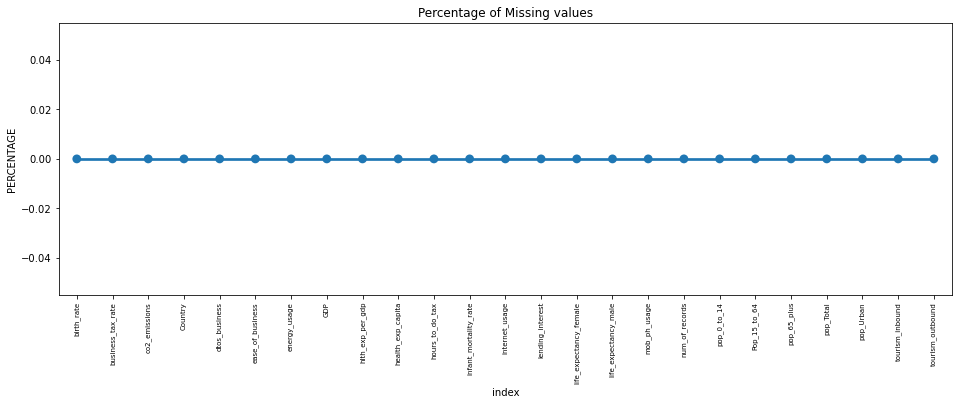

In [19]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [20]:
data.isnull().sum()

birth_rate                0
business_tax_rate         0
co2_emissions             0
Country                   0
dtos_business             0
ease_of_business          0
energy_usage              0
GDP                       0
hlth_exp_per_gdp          0
health_exp_capita         0
hours_to_do_tax           0
infant_mortality_rate     0
internet_usage            0
lending_interest          0
life_expectancy_female    0
life_expectancy_male      0
mob_ph_usage              0
num_of_records            0
pop_0_to_14               0
Pop_15_to_64              0
pop_65_plus               0
pop_Total                 0
pop_Urban                 0
tourism_inbound           0
tourism_outbound          0
dtype: int64

In [21]:
data1=data.copy()
data1

,birth_rate,business_tax_rate,co2_emissions,Country,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,...,life_expectancy_male,mob_ph_usage,num_of_records,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound
0,0.020000,48.966901,87931.000000,Algeria,39.999418,94.875676,2.699800e+04,5.479006e+10,0.03500,60.000000,...,67.000000,0.000000,1.0,0.342000,0.619000,0.039000,31719449.0,0.599,1.020000e+08,1.930000e+08
1,0.050000,48.966901,9542.000000,Angola,39.999418,94.875676,7.499000e+03,9.129595e+09,0.03400,22.000000,...,44.000000,0.000000,1.0,0.476000,0.499000,0.025000,13924930.0,0.324,3.400000e+07,1.460000e+08
2,0.043000,48.966901,1617.000000,Benin,39.999418,94.875676,1.983000e+03,2.359122e+09,0.04300,15.000000,...,53.000000,0.000000,1.0,0.454000,0.517000,0.029000,6949366.0,0.383,7.700000e+07,5.000000e+07
3,0.027000,48.966901,4276.000000,Botswana,39.999418,94.875676,1.836000e+03,5.788312e+09,0.04700,152.000000,...,49.000000,0.100000,1.0,0.383000,0.587000,0.029000,1755375.0,0.532,2.270000e+08,2.090000e+08
4,0.046000,48.966901,1041.000000,Burkina Faso,39.999418,94.875676,7.723684e+04,2.610959e+09,0.05100,12.000000,...,49.000000,0.000000,1.0,0.468000,0.505000,0.028000,11607944.0,0.178,2.300000e+07,3.000000e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.022715,48.966901,142307.107765,Turks and Caicos Islands,39.999418,94.875676,7.723684e+04,2.638540e+11,0.06417,801.397077,...,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,32427.0,0.911,4.939320e+09,4.729435e+09
2700,0.013000,46.400000,142307.107765,United States,5.000000,4.000000,2.132446e+06,1.624460e+13,0.17900,8895.000000,...,76.000000,1.000000,1.0,0.196000,0.667000,0.136000,313873685.0,0.811,2.000920e+11,1.265730e+11
2701,0.015000,41.900000,142307.107765,Uruguay,7.000000,85.000000,7.723684e+04,5.000435e+10,0.08900,1308.000000,...,74.000000,1.500000,1.0,0.220000,0.639000,0.140000,3395253.0,0.948,2.222000e+09,1.028000e+09
2702,0.020000,61.900000,142307.107765,"Venezuela, RB",144.000000,180.000000,7.723684e+04,3.812862e+11,0.04600,593.000000,...,72.000000,1.000000,1.0,0.288000,0.652000,0.060000,29954782.0,0.889,9.040000e+08,3.202000e+09


In [22]:
data1=data1.drop(['Country','num_of_records'],axis=1)

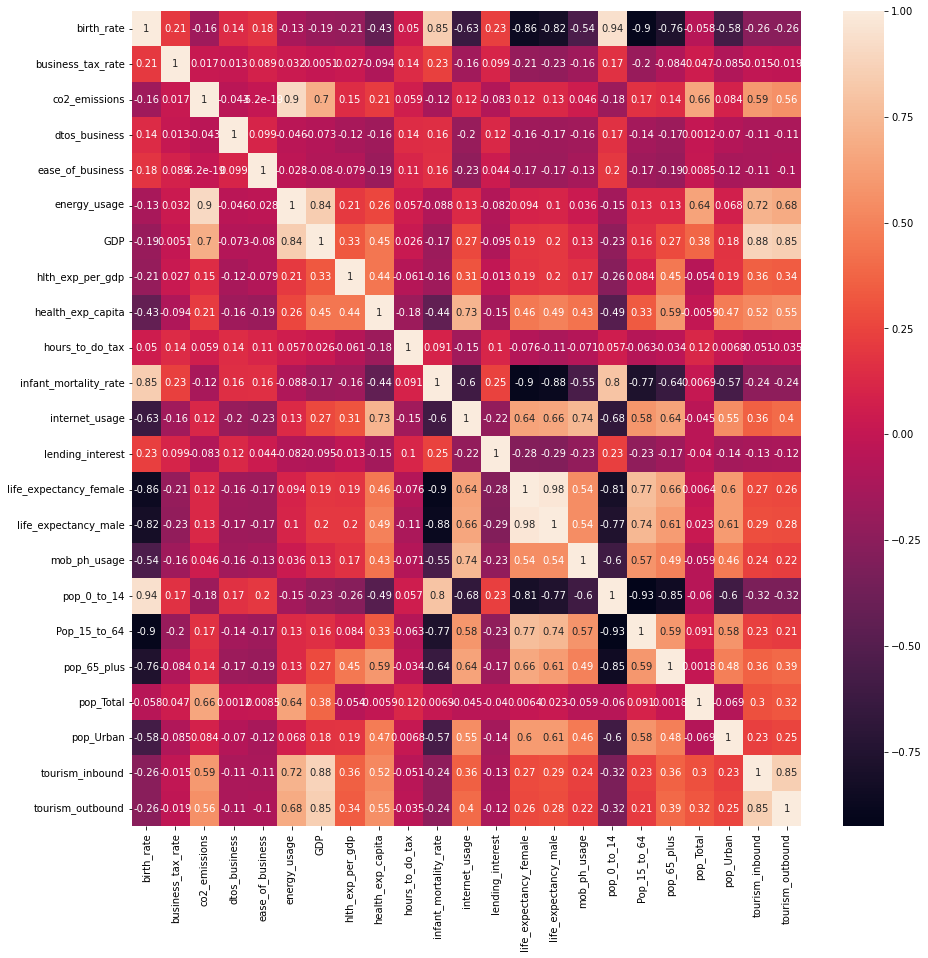

In [23]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(data1.corr(),annot=True)

Birth rate of the country and population 0 to 14 having +ve correlation

Birth rate of the country and infant mortality rate are also having +ve coorelation

birth rate of the country and population from 15 to 64 age group ppls having -ve correlation

CO2 emmision and energy ussage having +ve correlation

life expectency of male and female having good +ve corr


# Finding outliers using Boxplot

birth_rate


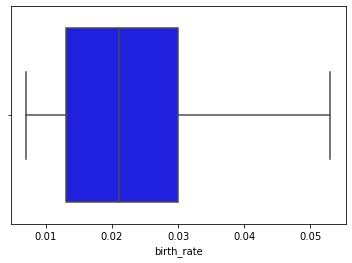

business_tax_rate


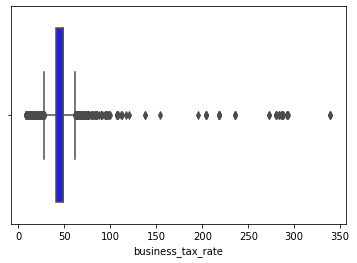

co2_emissions


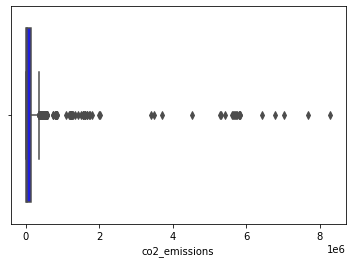

dtos_business


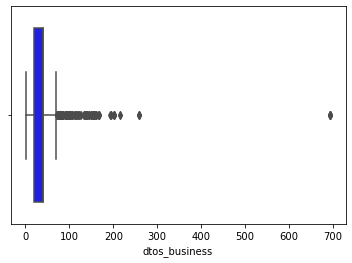

ease_of_business


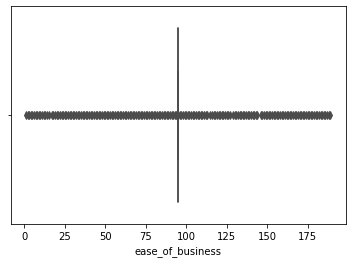

energy_usage


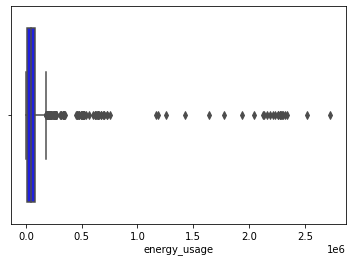

GDP


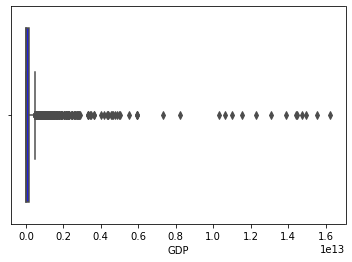

hlth_exp_per_gdp


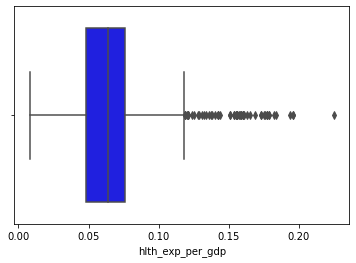

health_exp_capita


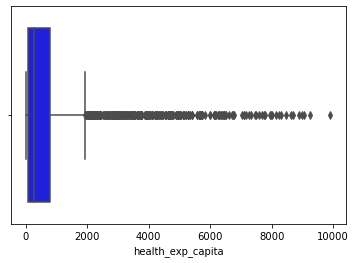

hours_to_do_tax


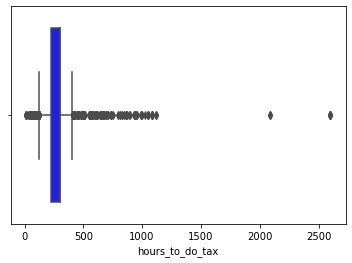

infant_mortality_rate


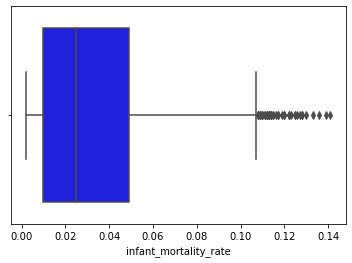

internet_usage


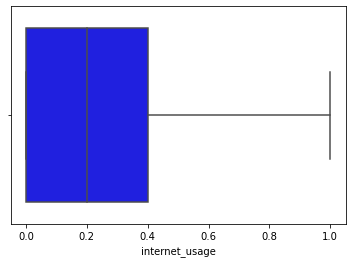

lending_interest


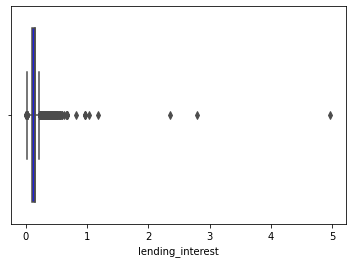

life_expectancy_female


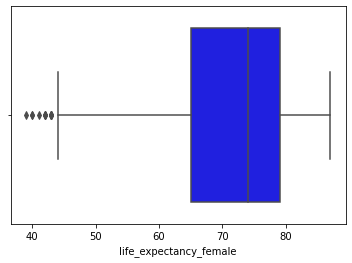

life_expectancy_male


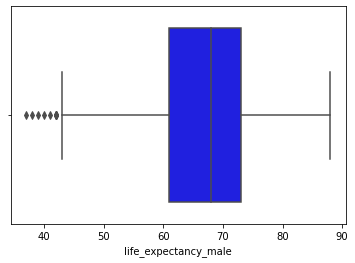

mob_ph_usage


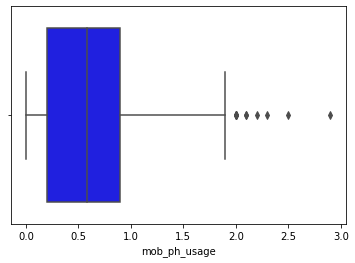

pop_0_to_14


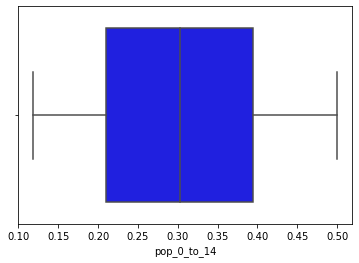

Pop_15_to_64


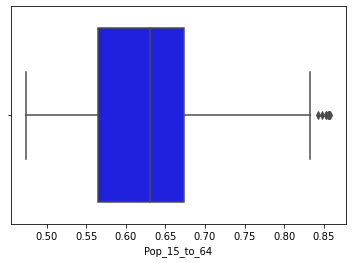

pop_65_plus


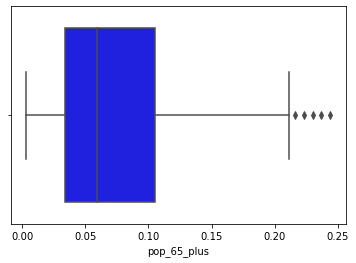

pop_Total


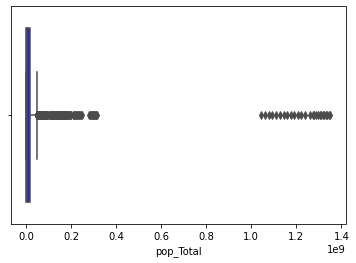

pop_Urban


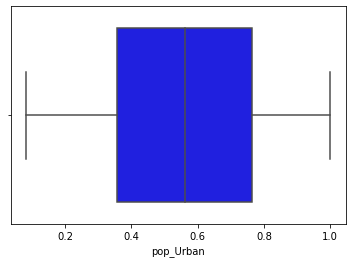

tourism_inbound


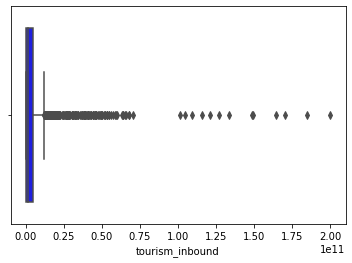

tourism_outbound


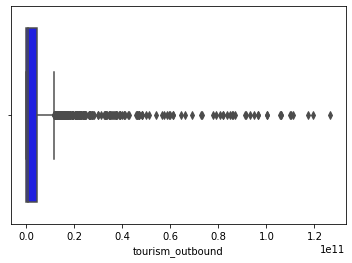

In [24]:
for i in data1.iloc[:,:]:
    print(i)
    sns.boxplot(data1[i],color='blue')
    plt.show()

In [25]:
cols= ['business_tax_rate', 'co2_emissions','dtos_business','ease_of_business',
       'energy_usage','GDP','hlth_exp_per_gdp','health_exp_capita',
       'hours_to_do_tax','infant_mortality_rate','internet_usage',
       'lending_interest','life_expectancy_female','life_expectancy_male',
       'mob_ph_usage','pop_0_to_14','Pop_15_to_64','pop_65_plus',
       'pop_Total','pop_Urban','tourism_inbound','tourism_outbound']
cols

['business_tax_rate',
 'co2_emissions',
 'dtos_business',
 'ease_of_business',
 'energy_usage',
 'GDP',
 'hlth_exp_per_gdp',
 'health_exp_capita',
 'hours_to_do_tax',
 'infant_mortality_rate',
 'internet_usage',
 'lending_interest',
 'life_expectancy_female',
 'life_expectancy_male',
 'mob_ph_usage',
 'pop_0_to_14',
 'Pop_15_to_64',
 'pop_65_plus',
 'pop_Total',
 'pop_Urban',
 'tourism_inbound',
 'tourism_outbound']

In [26]:
def len_outliers(data1, features):
    for i in features:
        q1 = data1[i].quantile(0.25)
        q3 = data1[i].quantile(0.75)
        iqr = q3 - q1
        lower_fence = q1-1.5*iqr
        higher_fence = q3+1.5*iqr
        print(i," = ",  len(data1[(data1[i] < lower_fence) | (data1[i] > higher_fence)]))  

In [27]:
len_outliers(data1, cols)

business_tax_rate  =  451
co2_emissions  =  176
dtos_business  =  213
ease_of_business  =  185
energy_usage  =  158
GDP  =  238
hlth_exp_per_gdp  =  58
health_exp_capita  =  317
hours_to_do_tax  =  475
infant_mortality_rate  =  49
internet_usage  =  0
lending_interest  =  245
life_expectancy_female  =  14
life_expectancy_male  =  11
mob_ph_usage  =  11
pop_0_to_14  =  0
Pop_15_to_64  =  9
pop_65_plus  =  5
pop_Total  =  318
pop_Urban  =  0
tourism_inbound  =  244
tourism_outbound  =  225


# Scaling the Data

In [28]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return x

In [29]:
data1_norm = norm_func(data1.iloc[:,:])
data1_norm

,birth_rate,business_tax_rate,co2_emissions,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,hours_to_do_tax,...,life_expectancy_female,life_expectancy_male,mob_ph_usage,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound
0,0.282609,0.123200,0.010610,0.056276,0.499339,0.009895,0.003369,0.124424,0.005855,0.112082,...,0.666667,0.588235,0.000000,0.586387,0.377604,0.149378,0.023470,0.563181,0.000506,0.001523
1,0.934783,0.123200,0.001151,0.056276,0.499339,0.002746,0.000558,0.119816,0.002019,0.112082,...,0.166667,0.137255,0.000000,0.937173,0.065104,0.091286,0.010296,0.263617,0.000166,0.001152
2,0.782609,0.123200,0.000194,0.056276,0.499339,0.000724,0.000141,0.161290,0.001312,0.112082,...,0.375000,0.313725,0.000000,0.879581,0.111979,0.107884,0.005131,0.327887,0.000381,0.000393
3,0.434783,0.123200,0.000515,0.056276,0.499339,0.000670,0.000352,0.179724,0.015142,0.112082,...,0.270833,0.235294,0.034483,0.693717,0.294271,0.107884,0.001286,0.490196,0.001131,0.001650
4,0.847826,0.123200,0.000125,0.056276,0.499339,0.028313,0.000157,0.198157,0.001009,0.112082,...,0.270833,0.235294,0.000000,0.916230,0.080729,0.103734,0.008580,0.104575,0.000111,0.000235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.341628,0.123200,0.017172,0.056276,0.499339,0.028313,0.016239,0.258846,0.080698,0.112082,...,0.669985,0.577683,0.199353,0.484427,0.389275,0.292384,0.000010,0.903050,0.024682,0.037364
2700,0.130435,0.115443,0.017172,0.005772,0.015957,0.781766,1.000000,0.788018,0.897739,0.062983,...,0.875000,0.764706,0.344828,0.204188,0.502604,0.551867,0.232369,0.794118,1.000000,1.000000
2701,0.173913,0.101843,0.017172,0.008658,0.446809,0.028313,0.003074,0.373272,0.131839,0.115147,...,0.854167,0.725490,0.517241,0.267016,0.429688,0.568465,0.002500,0.943355,0.011101,0.008120
2702,0.282609,0.162285,0.017172,0.206349,0.952128,0.028313,0.023468,0.175115,0.059661,0.301391,...,0.812500,0.686275,0.344828,0.445026,0.463542,0.236515,0.022164,0.879085,0.004514,0.025296


## Model Building

## Hierarchical Clustering

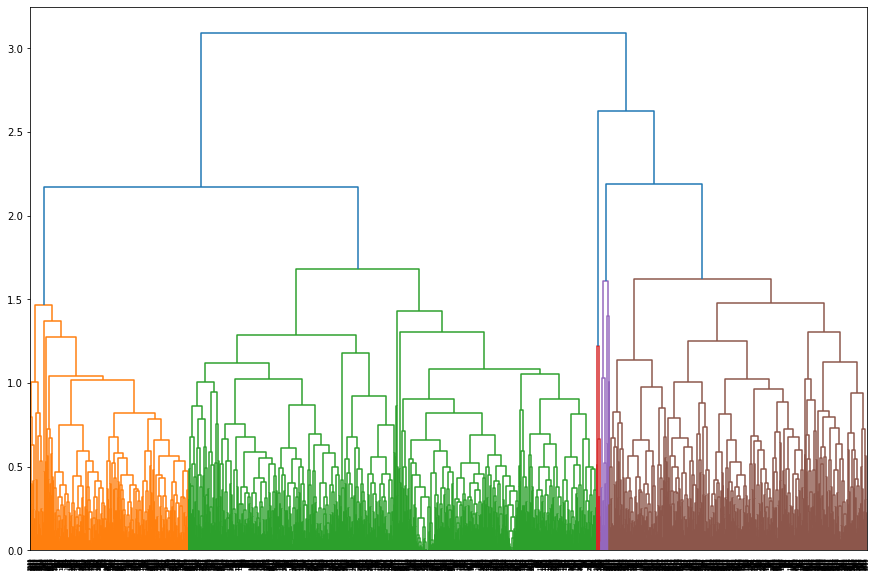

In [43]:
# create dendrogram
plt.figure(figsize=(15, 10))  
dendrogram = sch.dendrogram(sch.linkage(data1_norm,'complete' ))

In [44]:
# Creating a loop to calculate the maximum silhouette score and its corresponding number of clusters
# By iterating through various cluster numbers

scores=[]
hc_score=0
hc_cluster=0
i=0
for c in range(2,10):
    hc= AgglomerativeClustering(n_clusters=c, affinity = 'euclidean', linkage = 'complete')
    hc_pred = hc.fit_predict(data1_norm)
    score= sil (data1_norm, hc_pred, metric='euclidean')
    scores.append(score)
    i=i+1
    if (score>=max(scores)):
        hc_score=round(score,5)
        hc_cluster=c
        
        
print("Maximum silhouette score is {} for optimal number of clusters = {}.".format(hc_score,hc_cluster))
print("Number of iterations:",i)

Maximum silhouette score is 0.27925 for optimal number of clusters = 4.
Number of iterations: 8


In [45]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=4)

In [46]:
y=pd.DataFrame(hclusters.fit_predict(data1_norm),columns=['clustersid_hiera'])
y['clustersid_hiera'].value_counts()

0    852
3    709
1    701
2    442
Name: clustersid_hiera, dtype: int64

In [47]:
#Adding clusters to dataset
data['Clustersid_hiera']=hclusters.labels_
data

,birth_rate,business_tax_rate,co2_emissions,Country,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,...,mob_ph_usage,num_of_records,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound,Clustersid_hiera
0,0.020000,48.966901,87931.000000,Algeria,39.999418,94.875676,2.699800e+04,5.479006e+10,0.03500,60.000000,...,0.000000,1.0,0.342000,0.619000,0.039000,31719449.0,0.599,1.020000e+08,1.930000e+08,3
1,0.050000,48.966901,9542.000000,Angola,39.999418,94.875676,7.499000e+03,9.129595e+09,0.03400,22.000000,...,0.000000,1.0,0.476000,0.499000,0.025000,13924930.0,0.324,3.400000e+07,1.460000e+08,2
2,0.043000,48.966901,1617.000000,Benin,39.999418,94.875676,1.983000e+03,2.359122e+09,0.04300,15.000000,...,0.000000,1.0,0.454000,0.517000,0.029000,6949366.0,0.383,7.700000e+07,5.000000e+07,2
3,0.027000,48.966901,4276.000000,Botswana,39.999418,94.875676,1.836000e+03,5.788312e+09,0.04700,152.000000,...,0.100000,1.0,0.383000,0.587000,0.029000,1755375.0,0.532,2.270000e+08,2.090000e+08,3
4,0.046000,48.966901,1041.000000,Burkina Faso,39.999418,94.875676,7.723684e+04,2.610959e+09,0.05100,12.000000,...,0.000000,1.0,0.468000,0.505000,0.028000,11607944.0,0.178,2.300000e+07,3.000000e+07,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.022715,48.966901,142307.107765,Turks and Caicos Islands,39.999418,94.875676,7.723684e+04,2.638540e+11,0.06417,801.397077,...,0.578124,1.0,0.303051,0.623481,0.073465,32427.0,0.911,4.939320e+09,4.729435e+09,1
2700,0.013000,46.400000,142307.107765,United States,5.000000,4.000000,2.132446e+06,1.624460e+13,0.17900,8895.000000,...,1.000000,1.0,0.196000,0.667000,0.136000,313873685.0,0.811,2.000920e+11,1.265730e+11,0
2701,0.015000,41.900000,142307.107765,Uruguay,7.000000,85.000000,7.723684e+04,5.000435e+10,0.08900,1308.000000,...,1.500000,1.0,0.220000,0.639000,0.140000,3395253.0,0.948,2.222000e+09,1.028000e+09,0
2702,0.020000,61.900000,142307.107765,"Venezuela, RB",144.000000,180.000000,7.723684e+04,3.812862e+11,0.04600,593.000000,...,1.000000,1.0,0.288000,0.652000,0.060000,29954782.0,0.889,9.040000e+08,3.202000e+09,1


In [48]:
data.groupby('Clustersid_hiera').agg(['mean']).reset_index()

,Clustersid_hiera,birth_rate,business_tax_rate,co2_emissions,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,...,life_expectancy_male,mob_ph_usage,num_of_records,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,0.011999,44.927533,227264.760636,27.029141,91.264123,108243.300360,6.050955e+11,0.077594,1981.069613,...,73.803641,0.900363,1.0,0.190598,0.679068,0.130331,2.069192e+07,0.767264,1.077979e+10,1.048895e+10
1,1,0.019189,46.356705,204770.413715,45.011157,94.925735,95091.397155,2.271825e+11,0.058420,497.620673,...,69.999712,0.690870,1.0,0.282054,0.654861,0.063090,6.206537e+07,0.627707,3.887712e+09,3.379033e+09
2,2,0.040914,67.955771,24334.799940,47.827850,95.812878,48111.773337,2.553047e+10,0.060341,107.402483,...,51.004525,0.194514,1.0,0.443432,0.526708,0.029833,1.706605e+07,0.327014,1.176885e+09,1.476877e+09
3,3,0.027733,44.563809,52001.130813,45.750165,98.581893,40480.469190,3.861861e+10,0.056109,116.787584,...,63.777587,0.318565,1.0,0.371431,0.585987,0.042586,2.310295e+07,0.400496,1.306162e+09,1.171115e+09


In [49]:
data[data['Clustersid_hiera']==0]

,birth_rate,business_tax_rate,co2_emissions,Country,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,...,mob_ph_usage,num_of_records,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound,Clustersid_hiera
54,0.013,48.966901,3.465000e+03,Armenia,39.999418,94.875676,2.015000e+03,1.911564e+09,0.06300,39.000000,...,0.000000,1.0,0.259000,0.641000,0.100000,3076098.0,0.647,5.200000e+07,5.600000e+07,0
61,0.012,48.966901,4.536000e+03,Georgia,39.999418,94.875676,2.869000e+03,3.057453e+09,0.06900,45.000000,...,0.000000,1.0,0.219000,0.656000,0.125000,4418300.0,0.526,1.070000e+08,1.290000e+08,0
62,0.008,48.966901,4.046500e+04,"Hong Kong SAR, China",39.999418,94.875676,1.339200e+04,1.716682e+11,0.06417,801.397077,...,0.800000,1.0,0.173000,0.717000,0.110000,6665000.0,1.000,8.198000e+09,1.250200e+10,0
65,0.009,48.966901,1.219589e+06,Japan,39.999418,94.875676,5.189640e+05,4.731199e+12,0.07600,2834.000000,...,0.500000,1.0,0.146000,0.682000,0.172000,126870000.0,0.786,5.970000e+09,4.264300e+10,0
68,0.013,48.966901,4.475610e+05,"Korea, Rep.",39.999418,94.875676,1.881610e+05,5.616330e+11,0.04300,491.000000,...,0.600000,1.0,0.210000,0.717000,0.073000,47008111.0,0.796,8.527000e+09,7.945000e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2679,0.014,48.966901,1.423071e+05,Greenland,39.999418,94.875676,7.723684e+04,2.638540e+11,0.06417,801.397077,...,1.000000,1.0,0.303051,0.623481,0.073465,56810.0,0.852,4.939320e+09,4.729435e+09,0
2691,0.011,50.700000,1.423071e+05,Puerto Rico,6.000000,37.000000,7.723684e+04,1.010807e+11,0.06417,801.397077,...,0.800000,1.0,0.198000,0.667000,0.135000,3651545.0,0.937,3.193000e+09,1.156000e+09,0
2700,0.013,46.400000,1.423071e+05,United States,5.000000,4.000000,2.132446e+06,1.624460e+13,0.17900,8895.000000,...,1.000000,1.0,0.196000,0.667000,0.136000,313873685.0,0.811,2.000920e+11,1.265730e+11,0
2701,0.015,41.900000,1.423071e+05,Uruguay,7.000000,85.000000,7.723684e+04,5.000435e+10,0.08900,1308.000000,...,1.500000,1.0,0.220000,0.639000,0.140000,3395253.0,0.948,2.222000e+09,1.028000e+09,0


In [50]:
data[data['Clustersid_hiera']==1]

,birth_rate,business_tax_rate,co2_emissions,Country,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,...,mob_ph_usage,num_of_records,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound,Clustersid_hiera
26,0.022000,48.966901,4.711400e+04,Libya,39.999418,94.875676,1.590100e+04,3.389660e+10,0.03400,252.000000,...,0.000000,1.0,0.333000,0.628000,0.039000,5.176185e+06,0.763,8.400000e+07,4.950000e+08,1
40,0.019000,48.966901,5.650000e+02,Seychelles,39.999418,94.875676,7.723684e+04,6.148780e+08,0.04800,371.000000,...,0.300000,1.0,0.282000,0.637000,0.081000,8.113100e+04,0.501,2.250000e+08,4.400000e+07,1
49,0.017000,48.966901,1.992300e+04,Tunisia,39.999418,94.875676,7.306000e+03,2.147319e+10,0.05400,123.000000,...,0.000000,1.0,0.298000,0.641000,0.060000,9.563500e+06,0.634,1.977000e+09,3.100000e+08,1
58,0.023000,48.966901,6.527000e+03,Brunei Darussalam,39.999418,94.875676,2.385000e+03,6.001153e+09,0.03000,543.000000,...,0.300000,1.0,0.304000,0.668000,0.028000,3.318010e+05,0.712,4.939320e+09,4.729435e+09,1
60,0.014000,48.966901,3.405180e+06,China,39.999418,94.875676,1.161353e+06,1.198475e+12,0.04600,43.000000,...,0.100000,1.0,0.256000,0.675000,0.069000,1.262645e+09,0.359,1.731800e+10,1.416900e+10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2696,0.017000,38.700000,1.423071e+05,St. Vincent and the Grenadines,10.000000,75.000000,7.723684e+04,6.944444e+08,0.05200,340.000000,...,1.200000,1.0,0.257000,0.675000,0.068000,1.093730e+05,0.495,9.300000e+07,1.400000e+07,1
2697,0.018000,27.900000,1.423071e+05,Suriname,694.000000,165.000000,7.723684e+04,5.012121e+09,0.05900,521.000000,...,1.100000,1.0,0.278000,0.656000,0.066000,5.345410e+05,0.662,7.900000e+07,5.800000e+07,1
2698,0.015000,29.100000,1.423071e+05,Trinidad and Tobago,41.000000,63.000000,7.723684e+04,2.343634e+10,0.05400,972.000000,...,1.400000,1.0,0.207000,0.705000,0.088000,1.337439e+06,0.088,4.939320e+09,4.729435e+09,1
2699,0.022715,48.966901,1.423071e+05,Turks and Caicos Islands,39.999418,94.875676,7.723684e+04,2.638540e+11,0.06417,801.397077,...,0.578124,1.0,0.303051,0.623481,0.073465,3.242700e+04,0.911,4.939320e+09,4.729435e+09,1


In [51]:
data[data['Clustersid_hiera']==2]

,birth_rate,business_tax_rate,co2_emissions,Country,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,...,mob_ph_usage,num_of_records,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound,Clustersid_hiera
1,0.050,48.966901,9542.000000,Angola,39.999418,94.875676,7499.000000,9.129595e+09,0.03400,22.000000,...,0.0,1.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08,2
2,0.043,48.966901,1617.000000,Benin,39.999418,94.875676,1983.000000,2.359122e+09,0.04300,15.000000,...,0.0,1.0,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07,2
4,0.046,48.966901,1041.000000,Burkina Faso,39.999418,94.875676,77236.840896,2.610959e+09,0.05100,12.000000,...,0.0,1.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07,2
5,0.042,48.966901,301.000000,Burundi,39.999418,94.875676,77236.840896,8.704861e+08,0.06300,7.000000,...,0.0,1.0,0.490,0.481,0.029,6674286.0,0.082,1.400000e+06,1.400000e+07,2
6,0.041,48.966901,3432.000000,Cameroon,39.999418,94.875676,6310.000000,9.287368e+09,0.04400,26.000000,...,0.0,1.0,0.453,0.513,0.034,15927713.0,0.455,1.320000e+08,2.410000e+08,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2537,0.037,32.400000,142307.107765,Sierra Leone,12.000000,137.000000,77236.840896,3.787393e+09,0.15100,96.000000,...,0.4,1.0,0.417,0.556,0.026,5978727.0,0.389,4.100000e+07,2.500000e+07,2
2538,0.044,48.966901,142307.107765,Somalia,39.999418,94.875676,77236.840896,2.638540e+11,0.06417,801.397077,...,0.2,1.0,0.473,0.498,0.028,10195134.0,0.382,4.939320e+09,4.729435e+09,2
2542,0.030,36.500000,142307.107765,Swaziland,56.000000,120.000000,77236.840896,4.049589e+09,0.08500,259.000000,...,0.7,1.0,0.380,0.585,0.034,1230985.0,0.214,4.939320e+09,4.729435e+09,2
2546,0.044,36.600000,142307.107765,Uganda,33.000000,126.000000,77236.840896,2.003224e+10,0.08000,44.000000,...,0.5,1.0,0.485,0.490,0.024,36345860.0,0.151,1.105000e+09,6.040000e+08,2


In [52]:
data[data['Clustersid_hiera']==3]

,birth_rate,business_tax_rate,co2_emissions,Country,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,...,mob_ph_usage,num_of_records,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound,Clustersid_hiera
0,0.020,48.966901,87931.000000,Algeria,39.999418,94.875676,26998.000000,5.479006e+10,0.035,60.0,...,0.000000,1.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,3
3,0.027,48.966901,4276.000000,Botswana,39.999418,94.875676,1836.000000,5.788312e+09,0.047,152.0,...,0.100000,1.0,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,3
13,0.030,48.966901,403.000000,Djibouti,39.999418,94.875676,77236.840896,5.512309e+08,0.058,44.0,...,0.000000,1.0,0.414,0.556,0.030,722887.0,0.765,8.100000e+06,1.480000e+07,3
14,0.025,48.966901,141326.000000,"Egypt, Arab Rep.",39.999418,94.875676,40658.000000,9.983854e+10,0.054,79.0,...,0.000000,1.0,0.354,0.592,0.053,66136590.0,0.428,4.657000e+09,1.206000e+09,3
16,0.040,48.966901,609.000000,Eritrea,39.999418,94.875676,708.000000,7.063708e+08,0.045,7.0,...,0.578124,1.0,0.470,0.512,0.018,3939348.0,0.176,3.600000e+07,4.729435e+09,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2682,0.021,35.900000,142307.107765,Guyana,20.000000,113.000000,77236.840896,2.851154e+09,0.066,235.0,...,0.700000,1.0,0.368,0.599,0.033,795369.0,0.283,6.400000e+07,8.200000e+07,3
2683,0.026,40.400000,142307.107765,Haiti,105.000000,177.000000,77236.840896,7.890217e+09,0.064,53.0,...,0.600000,1.0,0.354,0.601,0.045,10173775.0,0.548,1.700000e+08,4.740000e+08,3
2684,0.026,40.000000,142307.107765,Honduras,14.000000,125.000000,77236.840896,1.856426e+10,0.086,195.0,...,0.900000,1.0,0.357,0.599,0.044,7935846.0,0.529,6.660000e+08,4.640000e+08,3
2687,0.023,64.900000,142307.107765,Nicaragua,39.000000,123.000000,77236.840896,1.064497e+10,0.082,144.0,...,1.000000,1.0,0.334,0.620,0.046,5991733.0,0.578,4.220000e+08,3.720000e+08,3


## KMeans

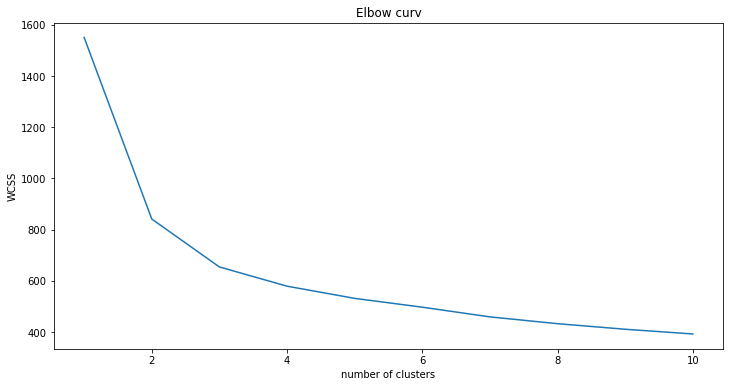

In [53]:
# Elbow curve
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data1_norm)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6 ))  
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

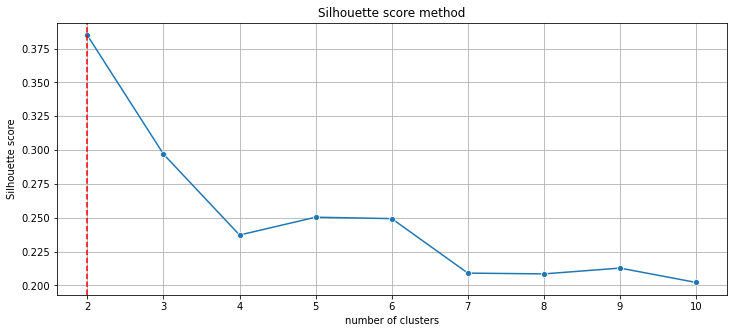

In [54]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(data1_norm)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = sil(data1_norm, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score method

fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(2, ls="--", c="red")
plt.grid()
plt.show()

Silhouette score is maximum at number of clusters = 2

In [55]:
# Creating a loop to calculate the maximum silhouette score and its corresponding number of clusters
# By iterating through various cluster numbers

scores=[]
km_score=0
km_cluster=0
i=0
for c in range(2,11):
    km= KMeans(n_clusters=c, random_state=0)
    km_pred = km.fit_predict(data1_norm)
    score= sil(data1_norm, km_pred, metric='euclidean')
    scores.append(score)
    i=i+1
    if (score>=max(scores)):
        km_score=round(score,3)
        km_cluster=c
        
print("Maximum silhouette score is {} for optimal number of clusters = {}.".format(km_score,km_cluster))
print("Number of iterations:",i)


Maximum silhouette score is 0.385 for optimal number of clusters = 2.
Number of iterations: 9


In [56]:
#selecting 2 clusters from above scree plot
model=KMeans(n_clusters=2)
model.fit(data1_norm)
model.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [57]:
x=pd.Series(model.labels_)
data['Clustid_Kmeans']=x
data

,birth_rate,business_tax_rate,co2_emissions,Country,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,...,num_of_records,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound,Clustersid_hiera,Clustid_Kmeans
0,0.020000,48.966901,87931.000000,Algeria,39.999418,94.875676,2.699800e+04,5.479006e+10,0.03500,60.000000,...,1.0,0.342000,0.619000,0.039000,31719449.0,0.599,1.020000e+08,1.930000e+08,3,0
1,0.050000,48.966901,9542.000000,Angola,39.999418,94.875676,7.499000e+03,9.129595e+09,0.03400,22.000000,...,1.0,0.476000,0.499000,0.025000,13924930.0,0.324,3.400000e+07,1.460000e+08,2,0
2,0.043000,48.966901,1617.000000,Benin,39.999418,94.875676,1.983000e+03,2.359122e+09,0.04300,15.000000,...,1.0,0.454000,0.517000,0.029000,6949366.0,0.383,7.700000e+07,5.000000e+07,2,0
3,0.027000,48.966901,4276.000000,Botswana,39.999418,94.875676,1.836000e+03,5.788312e+09,0.04700,152.000000,...,1.0,0.383000,0.587000,0.029000,1755375.0,0.532,2.270000e+08,2.090000e+08,3,0
4,0.046000,48.966901,1041.000000,Burkina Faso,39.999418,94.875676,7.723684e+04,2.610959e+09,0.05100,12.000000,...,1.0,0.468000,0.505000,0.028000,11607944.0,0.178,2.300000e+07,3.000000e+07,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.022715,48.966901,142307.107765,Turks and Caicos Islands,39.999418,94.875676,7.723684e+04,2.638540e+11,0.06417,801.397077,...,1.0,0.303051,0.623481,0.073465,32427.0,0.911,4.939320e+09,4.729435e+09,1,1
2700,0.013000,46.400000,142307.107765,United States,5.000000,4.000000,2.132446e+06,1.624460e+13,0.17900,8895.000000,...,1.0,0.196000,0.667000,0.136000,313873685.0,0.811,2.000920e+11,1.265730e+11,0,1
2701,0.015000,41.900000,142307.107765,Uruguay,7.000000,85.000000,7.723684e+04,5.000435e+10,0.08900,1308.000000,...,1.0,0.220000,0.639000,0.140000,3395253.0,0.948,2.222000e+09,1.028000e+09,0,1
2702,0.020000,61.900000,142307.107765,"Venezuela, RB",144.000000,180.000000,7.723684e+04,3.812862e+11,0.04600,593.000000,...,1.0,0.288000,0.652000,0.060000,29954782.0,0.889,9.040000e+08,3.202000e+09,1,1


In [58]:
data.iloc[:,:25].groupby(data.Clustid_Kmeans).mean()

,birth_rate,business_tax_rate,co2_emissions,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,hours_to_do_tax,...,life_expectancy_male,mob_ph_usage,num_of_records,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound
Clustid_Kmeans,,,,,,,,,,,,,,,,,,,,,
0,0.034046,54.435377,54497.117813,47.511238,97.822538,49826.448501,4.263082e+10,0.058025,101.776471,308.854107,...,57.800880,0.249750,1.0,0.408756,0.555948,0.035292,3.410971e+07,0.364970,1.266534e+09,1.389106e+09
1,0.015521,45.495378,198051.055437,35.230729,93.004935,94637.634134,4.042920e+11,0.068070,1245.533496,297.760834,...,71.960028,0.786584,1.0,0.235947,0.666354,0.097697,2.977348e+07,0.688637,7.270896e+09,6.849958e+09


In [59]:
data[data['Clustid_Kmeans']==0]

,birth_rate,business_tax_rate,co2_emissions,Country,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,...,num_of_records,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound,Clustersid_hiera,Clustid_Kmeans
0,0.020,48.966901,87931.000000,Algeria,39.999418,94.875676,26998.000000,5.479006e+10,0.035,60.0,...,1.0,0.342,0.619,0.039,31719449.0,0.599,1.020000e+08,1.930000e+08,3,0
1,0.050,48.966901,9542.000000,Angola,39.999418,94.875676,7499.000000,9.129595e+09,0.034,22.0,...,1.0,0.476,0.499,0.025,13924930.0,0.324,3.400000e+07,1.460000e+08,2,0
2,0.043,48.966901,1617.000000,Benin,39.999418,94.875676,1983.000000,2.359122e+09,0.043,15.0,...,1.0,0.454,0.517,0.029,6949366.0,0.383,7.700000e+07,5.000000e+07,2,0
3,0.027,48.966901,4276.000000,Botswana,39.999418,94.875676,1836.000000,5.788312e+09,0.047,152.0,...,1.0,0.383,0.587,0.029,1755375.0,0.532,2.270000e+08,2.090000e+08,3,0
4,0.046,48.966901,1041.000000,Burkina Faso,39.999418,94.875676,77236.840896,2.610959e+09,0.051,12.0,...,1.0,0.468,0.505,0.028,11607944.0,0.178,2.300000e+07,3.000000e+07,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,0.026,25.400000,142307.107765,Tonga,16.000000,60.000000,77236.840896,4.715755e+08,0.054,238.0,...,1.0,0.373,0.568,0.058,104941.0,0.235,4.939320e+09,4.729435e+09,3,0
2658,0.027,8.400000,142307.107765,Vanuatu,35.000000,78.000000,77236.840896,7.869383e+08,0.036,116.0,...,1.0,0.374,0.586,0.040,247262.0,0.252,2.880000e+08,4.300000e+07,3,0
2681,0.031,40.900000,142307.107765,Guatemala,40.000000,93.000000,77236.840896,5.038845e+10,0.067,226.0,...,1.0,0.408,0.547,0.045,15082831.0,0.502,1.419000e+09,9.140000e+08,3,0
2682,0.021,35.900000,142307.107765,Guyana,20.000000,113.000000,77236.840896,2.851154e+09,0.066,235.0,...,1.0,0.368,0.599,0.033,795369.0,0.283,6.400000e+07,8.200000e+07,3,0


In [60]:
data[data['Clustid_Kmeans']==1]

,birth_rate,business_tax_rate,co2_emissions,Country,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,...,num_of_records,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound,Clustersid_hiera,Clustid_Kmeans
26,0.022000,48.966901,47114.000000,Libya,39.999418,94.875676,1.590100e+04,3.389660e+10,0.03400,252.000000,...,1.0,0.333000,0.628000,0.039000,5176185.0,0.763,8.400000e+07,4.950000e+08,1,1
31,0.017000,48.966901,2769.000000,Mauritius,39.999418,94.875676,7.723684e+04,4.582562e+09,0.03700,146.000000,...,1.0,0.258000,0.681000,0.061000,1186873.0,0.427,7.320000e+08,2.030000e+08,3,1
40,0.019000,48.966901,565.000000,Seychelles,39.999418,94.875676,7.723684e+04,6.148780e+08,0.04800,371.000000,...,1.0,0.282000,0.637000,0.081000,81131.0,0.501,2.250000e+08,4.400000e+07,1,1
49,0.017000,48.966901,19923.000000,Tunisia,39.999418,94.875676,7.306000e+03,2.147319e+10,0.05400,123.000000,...,1.0,0.298000,0.641000,0.060000,9563500.0,0.634,1.977000e+09,3.100000e+08,1,1
54,0.013000,48.966901,3465.000000,Armenia,39.999418,94.875676,2.015000e+03,1.911564e+09,0.06300,39.000000,...,1.0,0.259000,0.641000,0.100000,3076098.0,0.647,5.200000e+07,5.600000e+07,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.022715,48.966901,142307.107765,Turks and Caicos Islands,39.999418,94.875676,7.723684e+04,2.638540e+11,0.06417,801.397077,...,1.0,0.303051,0.623481,0.073465,32427.0,0.911,4.939320e+09,4.729435e+09,1,1
2700,0.013000,46.400000,142307.107765,United States,5.000000,4.000000,2.132446e+06,1.624460e+13,0.17900,8895.000000,...,1.0,0.196000,0.667000,0.136000,313873685.0,0.811,2.000920e+11,1.265730e+11,0,1
2701,0.015000,41.900000,142307.107765,Uruguay,7.000000,85.000000,7.723684e+04,5.000435e+10,0.08900,1308.000000,...,1.0,0.220000,0.639000,0.140000,3395253.0,0.948,2.222000e+09,1.028000e+09,0,1
2702,0.020000,61.900000,142307.107765,"Venezuela, RB",144.000000,180.000000,7.723684e+04,3.812862e+11,0.04600,593.000000,...,1.0,0.288000,0.652000,0.060000,29954782.0,0.889,9.040000e+08,3.202000e+09,1,1


## DBSCAN

In [61]:
data1_norm.values

array([[2.82608696e-01, 1.23200063e-01, 1.06100181e-02, ...,
        5.63180828e-01, 5.06268888e-04, 1.52323406e-03],
       [9.34782609e-01, 1.23200063e-01, 1.15061329e-03, ...,
        2.63616558e-01, 1.66424027e-04, 1.15190625e-03],
       [7.82608696e-01, 1.23200063e-01, 1.94282894e-04, ...,
        3.27886710e-01, 3.81325925e-04, 3.93449461e-04],
       ...,
       [1.73913043e-01, 1.01843457e-01, 1.71717247e-02, ...,
        9.43355120e-01, 1.11014322e-02, 8.12022804e-03],
       [2.82608696e-01, 1.62284678e-01, 1.71717247e-02, ...,
        8.79084967e-01, 4.51443916e-03, 2.52961142e-02],
       [8.69565217e-02, 1.23200063e-01, 1.71717247e-02, ...,
        9.44444444e-01, 2.46818340e-02, 3.73637527e-02]])

In [62]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=20)
nbrs  = neigh.fit(data1_norm)
distances, indices = nbrs.kneighbors(data1_norm)

In [63]:
distances[0:5]

array([[0.        , 0.05479114, 0.09359833, 0.11005333, 0.1245948 ,
        0.12948295, 0.13243218, 0.14443878, 0.1485934 , 0.1536848 ,
        0.1722559 , 0.18729401, 0.18793729, 0.19372434, 0.19520575,
        0.20023676, 0.20199163, 0.20443102, 0.20477733, 0.20608929],
       [0.        , 0.05972497, 0.11386089, 0.14937876, 0.1688261 ,
        0.17992369, 0.22877813, 0.23249869, 0.23859439, 0.25580753,
        0.27622988, 0.28007679, 0.28845457, 0.29174848, 0.2955945 ,
        0.299996  , 0.3002148 , 0.30393679, 0.30734251, 0.30928276],
       [0.        , 0.0379016 , 0.0527564 , 0.08931147, 0.11769866,
        0.13348271, 0.13655243, 0.14301184, 0.15172138, 0.15696573,
        0.1575759 , 0.16342284, 0.16415603, 0.16662669, 0.16750093,
        0.17091828, 0.17291944, 0.17541253, 0.17626182, 0.17817854],
       [0.        , 0.05611065, 0.09966569, 0.15458989, 0.1810814 ,
        0.24527214, 0.25898416, 0.27100699, 0.27343133, 0.27501454,
        0.28206926, 0.29291368, 0.29291988, 0

In [64]:
distances.shape

(2704, 20)

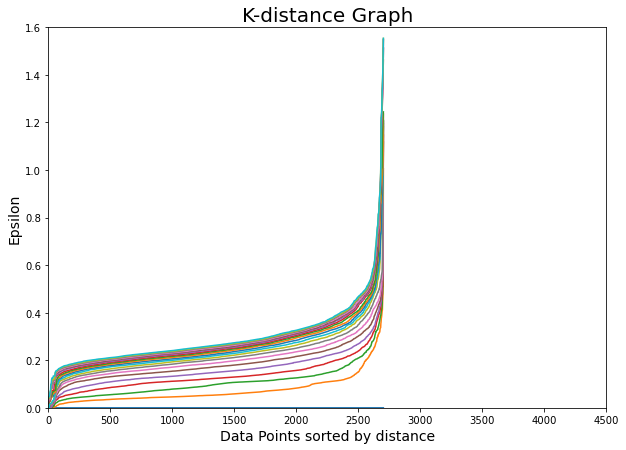

In [65]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances

plt.figure(figsize=(10,7))
plt.plot(distances)

plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.xlim(0,4500)
plt.ylim(0,1.6)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

 The optimal epsilon value is the point of maximum curvature in k-distance graph.
 Here epsilon can be between 0.1 to 0.3 


In [66]:
scores=[]

db_score=0
samp=0
eps=0

i=0

for s in range(15,40,5):
    for e in np.arange(0.40,1.25,0.05):
        db=DBSCAN(eps=e,min_samples=s)
        db.fit(data1_norm)
        db_pred=db.labels_
        score= sil(data1_norm, db_pred, metric='euclidean')
        scores.append(score)
        i=i+1
        
        if(score>=max(scores)):
            
            db_score=round(score,3)
            eps=e
            samp=s
        
print("Maximum silhouette score is {} for minimum number of samples-{} and epsilon value-{}.".format(db_score,samp,eps))
print("Number of iterations:",i)


Maximum silhouette score is 0.54 for minimum number of samples-35 and epsilon value-1.1999999999999997.
Number of iterations: 85


In [67]:
# Noisy Samples are label as -1
db.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [82]:
# number of clusters in labels, ignoring noise if present
labels=db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('no of clusters: %d' % n_clusters_)
n_noise_= list(labels).count(-1)
print('no of noise pts : %d' % n_noise_)

no of clusters: 1
no of noise pts : 12


In [69]:
cl=pd.DataFrame(db.labels_,columns=['Clusterid_dbscan'])
cl

,Clusterid_dbscan
0,0
1,0
2,0
3,0
4,0
...,...
2699,0
2700,-1
2701,0
2702,0


In [70]:
pd.concat([data,cl],axis=1)

,birth_rate,business_tax_rate,co2_emissions,Country,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,...,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound,Clustersid_hiera,Clustid_Kmeans,Clusterid_dbscan
0,0.020000,48.966901,87931.000000,Algeria,39.999418,94.875676,2.699800e+04,5.479006e+10,0.03500,60.000000,...,0.342000,0.619000,0.039000,31719449.0,0.599,1.020000e+08,1.930000e+08,3,0,0
1,0.050000,48.966901,9542.000000,Angola,39.999418,94.875676,7.499000e+03,9.129595e+09,0.03400,22.000000,...,0.476000,0.499000,0.025000,13924930.0,0.324,3.400000e+07,1.460000e+08,2,0,0
2,0.043000,48.966901,1617.000000,Benin,39.999418,94.875676,1.983000e+03,2.359122e+09,0.04300,15.000000,...,0.454000,0.517000,0.029000,6949366.0,0.383,7.700000e+07,5.000000e+07,2,0,0
3,0.027000,48.966901,4276.000000,Botswana,39.999418,94.875676,1.836000e+03,5.788312e+09,0.04700,152.000000,...,0.383000,0.587000,0.029000,1755375.0,0.532,2.270000e+08,2.090000e+08,3,0,0
4,0.046000,48.966901,1041.000000,Burkina Faso,39.999418,94.875676,7.723684e+04,2.610959e+09,0.05100,12.000000,...,0.468000,0.505000,0.028000,11607944.0,0.178,2.300000e+07,3.000000e+07,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,0.022715,48.966901,142307.107765,Turks and Caicos Islands,39.999418,94.875676,7.723684e+04,2.638540e+11,0.06417,801.397077,...,0.303051,0.623481,0.073465,32427.0,0.911,4.939320e+09,4.729435e+09,1,1,0
2700,0.013000,46.400000,142307.107765,United States,5.000000,4.000000,2.132446e+06,1.624460e+13,0.17900,8895.000000,...,0.196000,0.667000,0.136000,313873685.0,0.811,2.000920e+11,1.265730e+11,0,1,-1
2701,0.015000,41.900000,142307.107765,Uruguay,7.000000,85.000000,7.723684e+04,5.000435e+10,0.08900,1308.000000,...,0.220000,0.639000,0.140000,3395253.0,0.948,2.222000e+09,1.028000e+09,0,1,0
2702,0.020000,61.900000,142307.107765,"Venezuela, RB",144.000000,180.000000,7.723684e+04,3.812862e+11,0.04600,593.000000,...,0.288000,0.652000,0.060000,29954782.0,0.889,9.040000e+08,3.202000e+09,1,1,0


In [71]:
clustered=pd.concat([data,cl],axis=1)

In [72]:
clustered[clustered['Clusterid_dbscan']==-1]

,birth_rate,business_tax_rate,co2_emissions,Country,dtos_business,ease_of_business,energy_usage,GDP,hlth_exp_per_gdp,health_exp_capita,...,pop_0_to_14,Pop_15_to_64,pop_65_plus,pop_Total,pop_Urban,tourism_inbound,tourism_outbound,Clustersid_hiera,Clustid_Kmeans,Clusterid_dbscan
204,0.014,48.966901,5.713560e+06,United States,39.999418,94.875676,2273332.0,1.028970e+13,0.136,4790.0,...,0.213,0.663,0.124,282162411.0,0.791,1.209120e+11,9.147300e+10,0,1,-1
620,0.014,48.966901,5.650950e+06,United States,39.999418,94.875676,2255957.0,1.098020e+13,0.151,5578.0,...,0.210,0.667,0.123,287625193.0,0.794,1.044270e+11,8.186000e+10,0,1,-1
828,0.014,48.966901,5.681664e+06,United States,6.000000,94.875676,2261151.0,1.151220e+13,0.156,5993.0,...,0.209,0.669,0.123,290107933.0,0.796,1.015350e+11,8.209100e+10,0,1,-1
1036,0.014,48.966901,5.790765e+06,United States,6.000000,94.875676,2307819.0,1.227700e+13,0.157,6355.0,...,0.207,0.670,0.123,292805298.0,0.798,1.156890e+11,9.476400e+10,0,1,-1
1244,0.014,45.800000,5.826394e+06,United States,6.000000,94.875676,2318861.0,1.309540e+13,0.158,6732.0,...,0.205,0.671,0.123,295516599.0,0.799,1.272370e+11,1.002500e+11,0,1,-1
1452,0.014,47.400000,5.737616e+06,United States,6.000000,94.875676,2296686.0,1.385790e+13,0.159,7110.0,...,0.204,0.672,0.124,298379912.0,0.801,1.333930e+11,1.054760e+11,0,1,-1
1660,0.014,46.100000,5.828697e+06,United States,6.000000,94.875676,2337014.0,1.448030e+13,0.161,7486.0,...,0.202,0.673,0.125,301231207.0,0.803,1.488460e+11,1.111020e+11,0,1,-1
1868,0.014,46.400000,5.656839e+06,United States,5.000000,94.875676,2277034.0,1.472030e+13,0.165,7769.0,...,0.201,0.673,0.127,304093966.0,0.804,1.705240e+11,1.192170e+11,0,1,-1
2076,0.014,46.100000,5.311840e+06,United States,5.000000,94.875676,2164458.0,1.441790e+13,0.177,8009.0,...,0.200,0.672,0.128,306771529.0,0.806,1.495100e+11,1.062850e+11,0,1,-1
2284,0.013,46.500000,5.433057e+06,United States,5.000000,94.875676,2215504.0,1.495830e+13,0.177,8254.0,...,0.198,0.671,0.131,309326295.0,0.808,1.646060e+11,1.103130e+11,0,1,-1


## Model Evaluation

The goal of partitioning clustering algorithms is to split the data set into clusters of objects, such that:
the objects in the same cluster are similar as much as possible, and the objects in different clusters are highly distinct.

For Model Evaluation and assessing the goodness of clustering we check Silhouette Score,Calinski Harabasz score and Davies Bouldin Index

- The silhouette analysis measures how well an observation is clustered and it estimates the average distance between clusters.
  Silhouette score ranges from -1 to 1 with -1 being worst score and 1 being the best score.Silhouette Score of 0 suggest         overlapping clusters

- Calinski Harabasz is also known as the Variance Ratio Crieterion
  The score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
  More the score better the result

- Davies Bouldin Index is defined as the average similarity measure of each cluster with its most similar cluster,where           similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and     less dispersed will result in a better score.
  The minimum score is zero, with lower values indicating better clustering.

### Hierarchical Clustering

In [73]:
#Silhouetter Score of Hierarchical Clustering
print('Silhouetter Score: %.3f' % hc_score)

Silhouetter Score: 0.279


In [74]:
#Calinski Harabasz score
ch_index = calinski_harabasz_score(data1_norm, hc_pred)

print(ch_index)

746.2383113686449


In [75]:
#Davies Bouldin Index
db_index = davies_bouldin_score(data1_norm, hc_pred)
print(db_index)

1.360960983179413


### KMeans Clustering

In [76]:
#Silhouetter Score of KMeans
print('Silhouetter Score: %.3f' % km_score)

Silhouetter Score: 0.385


In [77]:
#Calinski Harabasz score
ch_index_Km = calinski_harabasz_score(data1_norm, km_pred)

print(ch_index_Km)

890.2473197998756


In [78]:
#Davies Bouldin Index
db_index_Km = davies_bouldin_score(data1_norm, km_pred)
print(db_index_Km)

1.3244416454877697


### DBSCAN

In [79]:
#Silhouetter Score of DBSCAN
print('Silhouetter Score: %.3f' % db_score)

Silhouetter Score: 0.540


In [80]:
#Calinski Harabasz score
ch_index_db = calinski_harabasz_score(data1_norm, db_pred)

print(ch_index_db)

84.14122449459168


In [81]:
#Davies Bouldin Index
db_index_db = davies_bouldin_score(data1_norm, db_pred)
print(db_index_db)

0.5252933062116701


 For given data we found, 

- Silhouette score of Hierarchical Clustering model = 0.27925,
  Calinski Harabasz score =746.2383113686449,
  Davies Bouldin Index =1.360960983179413

- Silhouette score of KMeans model = 0.385,
  Calinski Harabasz score = 890.2473197998756,
  Davies Bouldin Index= 1.3244416454877697

- DBSCAN model is giving good Silhouette score = 0.54,
  Calinski Harabasz score =84.14122449459168,
  Davies Bouldin Index = 0.5252933062116701

#### DBSCAN model is giving better results with high Silhouette score =0.54, low Davies Bouldin Index = 0.5252933062116701